# Математическая статистика
## Практическое задание 3

В данном задании рассматриваются свойства условного математического ожидания. В частности, рассматривается модель смеси гауссовских распределений.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 1 балл
* Задача 3 - 2 балла
* Задача 4 - 7 баллов
* Задача 5<font size="5" color="red">\*</font> - 10 баллов

**Задача 1.** На вероятностном пространстве $\left(\mathbb{R}_+, \mathcal{B}(\mathbb{R}_+), \mathsf{P}\right)$, где $\mathsf{P}$ --- экспоненциальное распределение с параметром $\lambda$, задана случайная величина $\xi$ по правилу $\xi(\omega) = \omega$. Cигма-алгебра $\mathcal{G}$ порождена счетной системой событий $\{B_n\}_{n\geq1},$ где $B_n = \{n-1\leq \omega<n\}.$. Для $\omega \in [0, 5]$ постройте графики 
* плотности распределения $\mathsf{P}$ для $\lambda \in \{1, 3, 10\}$
* $\xi$ и $\mathsf{E}(\xi | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$
* $\xi^2$ и $\mathsf{E}(\xi^2 | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$

Используйте приведенный ниже шаблон. Одному и тому же значению $\lambda$ во всех графиках должен соответствовать один и тот же цвет.

In [1]:
from sklearn.mixture import GaussianMixture
import itertools
import numpy as np
import scipy as sp
import scipy.stats as sps
from matplotlib import pyplot as p
from matplotlib import cm
from sklearn.metrics import accuracy_score
%matplotlib inline

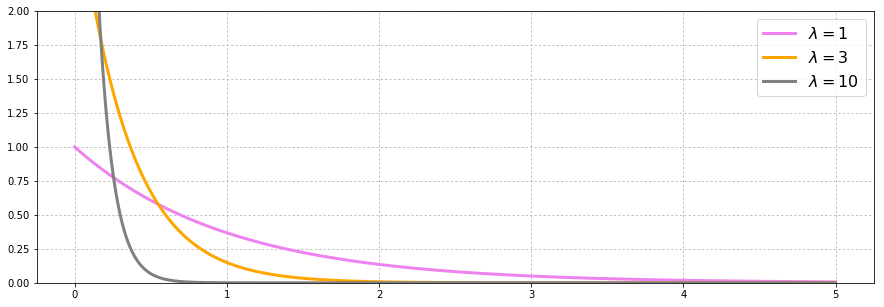

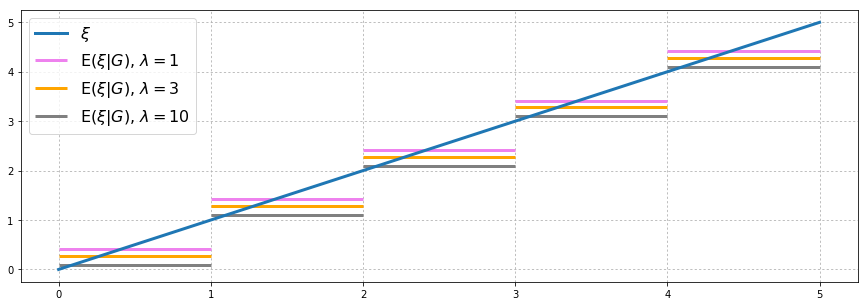

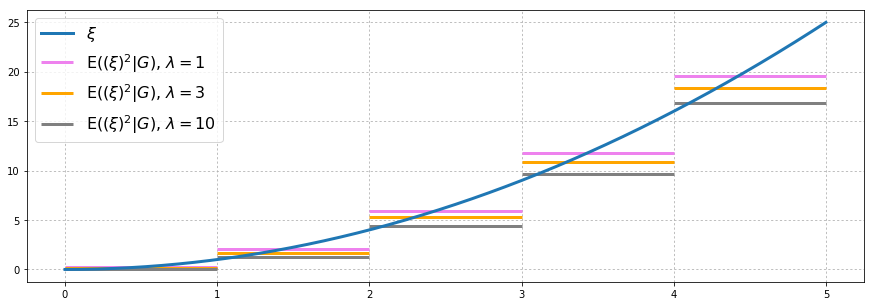

In [2]:
def Cond_Exp_x(num, l):
    res = (np.exp(l) * (l * (num - 1) + 1) - l * num - 1) / (l * (np.exp(l) - 1))
    return res

def Cond_Exp_Sqr_x(num, l):
    up = np.exp(l) * (l * (num- 1) * (l * (num - 1) + 2) + 2) - l * num * (l * num + 2) - 2
    res = up / (l ** 2 * (np.exp(l) - 1))
    return res
lamb = [1, 3, 10]
colors = ['violet', 'orange', 'grey']
omega = np.linspace(0, 5, 10000)

p.figure(figsize=(15, 5))
for i, color in zip(lamb, colors):
    
    # График 1
    p.plot(omega, 
           sps.expon.pdf(x = omega, 
                         scale =  1 / i
                        ), 
           lw = 3, 
           color = color, label='$\\lambda={}$'.format(i))
    p.legend(fontsize = 16)
    p.ylim((0, 2))
    p.grid(ls=':')
p.show()
    
# График 2    
p.figure(figsize=(15, 5))  
p.plot(omega,
       omega, 
       lw = 3, 
       label='$\\xi$')

for j, color in zip(lamb, colors):  
    for k in [num for num in range(1, 6)]:  
        p.hlines(Cond_Exp_x(k, j),
                 k - 1, 
                 k, 
                 color = color, 
                 lw = 3,
                   label=('$\\mathsf{E}(\\xi|{G})$, $\\lambda = ' + str(j) 
                          + '$') if k == 1 else '')
p.legend(fontsize=16)
p.grid(ls=':')
p.show()
    
# График 3
p.figure(figsize=(15, 5))  
p.plot(omega,
       omega ** 2, 
       lw = 3, 
       label='$\\xi$')

for l, color in zip(lamb, colors):  
    for i in [num for num in range(1, 6)]:  
        p.hlines(Cond_Exp_Sqr_x(i, l), 
                 i - 1, 
                 i, 
                 color = color,
                 lw = 3,
                   label=('$\\mathsf{E}((\\xi)^2|{G})$, $\\lambda = ' + str(l) 
                          + '$') if i == 1 else '')
        
p.legend(fontsize=16)
p.grid(ls=':')
p.show()

Из пройденного на семинарах -  $$ \mathsf{E}(\xi | \mathcal{G}) = \dfrac{e^\lambda(\lambda (n - 1) + 1) - \lambda n - 1}{e^\lambda - 1},$$ 

$$\mathsf{E}(\xi^2 | \mathcal{G}) = \dfrac{e^\lambda (\lambda (n-1)(\lambda(n-1) + 2) + 2) - \lambda n(\lambda n + 2) - 2 }{\lambda^2 (e^\lambda - 1)}$$

**Вывод:**
...

**Задача 2.** 
Пусть $\xi = (\xi_1, \xi_2) \sim \mathcal{N}(a, \Sigma)$, где $a=0$ и $\Sigma = \begin{pmatrix}10 & 8 \\ 8 & 10\end{pmatrix}$. Для $y \in \{-3, 0, 1, 5\}$ постройте графики условной плотности $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right)$.

Хотим построить график для условной плотности, которая суть есть $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right) = \frac{p_{(\xi_1, \xi_2)} (x, y)}{p_{\xi_2}(y)}$.

Так как имеет место нормальное распределение, то $p_{\xi_2}(y) = \int_{-\infty}^{\infty}p_{(\xi_1, \xi_2)} (x, y) dx = \frac{1}{12\sqrt{5\pi}} e ^ {-\frac{1}{20}y^2}$

Следовательно, $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right) = \frac{1}{6\pi} \sqrt{5} e^{-\frac{5}{36}x^2 + \frac{2}{9}xy - \frac{4}{45}y^2}$

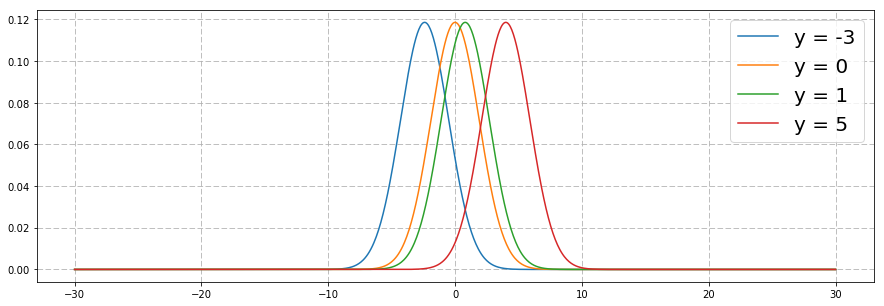

In [5]:
x = np.linspace(-30, 30, 1000)
def cond(x, y):
    res = 1/(6 * np.pi) * np.sqrt(5) * np.exp(-5/36 * x**2 + 2/9 * x*y - 4/45 * y**2)
    return res
p.figure(figsize=(15, 5))
for y in [-3,0,1,5]:
    p.plot(x, cond(x, y), label="y = {}".format(y))
p.legend(fontsize = 20)
p.grid(ls='--')
p.show()

**Вывод:** Условная плотность для г.в. $\xi = (\xi_1, \xi_2)$, тогда плотность $\xi_1$ при условии $\xi_2$ это $\mathcal{N}$

**Задача 3.**
Имеется множество серверов, которые периодически выходят из строя. 
Обозначим $\xi_i$ время между $i$-м моментом выхода из строя сервера и $(i+1)$-м.
Известно, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$.

Обозначим $N_t$ --- количество серверов, которые вышли из строя к моменту времени $t$ (в начальный момент времени $N_0 = 0$).
В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t - N_s \sim Pois(\lambda (t - s))$ и независима с $N_s$.
При этом $N_t$ как функция от $t$ будет называться пуассоновским процессом интенсивности $\lambda$.

Вам нужно знать, сколько серверов нужно докупить к моменту времени $t$ взамен вышедших из строя.
В момент времени $s$ предсказанием количества серверов, вышедших из строя к моменту времени $t$, будем считать величину $\mathsf{E}( N_t | N_s)$.

Сгенерируйте выборку случайных величин $\xi_i$ для $\lambda = 1/4$ в количестве, чтобы их сумма была больше 100.
Для $t=100$ постройте графики зависимости величины $\mathsf{E}( N_t | N_s)$ от $s$ в предополжении, что условное математическое ожидание было посчитано при значении $\lambda \in \{1/10, 1/4, 1/2, 1\}$. Нарисуйте также на графике горизонтальную прямую уровня $N_{100}$.

In [7]:
lamb = 1/4
t = 100
samp = sps.expon.rvs(size=10, 
                     scale=1/lamb)
while np.sum(samp) < 120:
    samp = np.concatenate([samp, 
                           sps.expon.rvs(
                               size=10, 
                               scale=1/lamb
                           )
                          ]
                         )

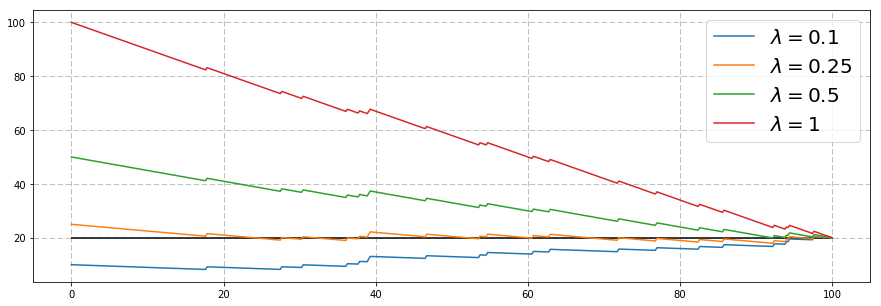

In [8]:
s = np.linspace(0, t, 500, endpoint=True)
Ns = np.array(list(map(lambda so: len(samp[np.cumsum(samp) <= so]), s)))
p.figure(figsize=(15, 5))
for i in [1/10, 1/4, 1/2, 1]:
    p.plot(s, Ns + i * (t - s), label='$\\lambda = {}$'.format(i))
p.hlines(
    len(
    samp[np.cumsum(samp) < 100]), 
    0, 
    100
)
p.legend(fontsize = 20)
p.grid(ls='--')


 **Вывод:** при $\lambda = \frac{1}{4}$ УМО устремляет к реальному числу поломок  $t$ $N_t$

**Задача 4.** 
Рассмотрим модель смеси многомерных гауссовских распределений, то есть распределение, имеющее плотность $p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k),$ где $T$ --- случайная величина, принимающая значения $\{1, ..., K\}$ и имеющая смысл номера компоненты смеси, а $p_k(x)$ --- плотность распределения $N(a_k, \Sigma_k)$.


Загрузите датасет "Ирисы Фишера", используя следующий код.

In [18]:
import seaborn as sns
from sklearn.datasets import load_iris
data = load_iris()
X = data['data']  # выборка
y = data['target']  # номера компонент смеси

В предположении, что каждый класс имеет гауссовское распределение, оцените его параметры. Используйте для этого функции `numpy.mean` и `numpy.cov`. Проверьте, что матрица ковариаций получилась правильной --- возможно, придется предварительно поменять порядок осей (транспонировать). Напечатайте полученные оценки.

In [19]:
s_0 = X[y == 0]
s_1 = X[y == 1]
s_2 = X[y == 2]

mean_0 = np.mean(s_0, axis=0)
mean_1 = np.mean(s_1, axis=0)
mean_2 = np.mean(s_2, axis=0)

cov_0 = np.cov(s_0.T)
cov_1 = np.cov(s_1.T)
cov_2 = np.cov(s_2.T)

gauss_0 = sps.multivariate_normal(mean = mean_0, cov = cov_0)
gauss_1 = sps.multivariate_normal(mean = mean_1, cov = cov_1) 
gauss_2 = sps.multivariate_normal(mean = mean_2, cov = cov_2)

print('\n Case 0:\n\n mean_0 = ', mean_0, '\n\n matrix_0 = \n', cov_0)
print('\n Case 1:\n\n mean_1 = ', mean_1, '\n\n matrix_1 = \n', cov_1)
print('\n Case 2:\n\n mean_2 = ', mean_2, '\n\n matrix_2 = \n', cov_2)


 Case 0:

 mean_0 =  [ 5.006  3.418  1.464  0.244] 

 matrix_0 = 
 [[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]

 Case 1:

 mean_1 =  [ 5.936  2.77   4.26   1.326] 

 matrix_1 = 
 [[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]

 Case 2:

 mean_2 =  [ 6.588  2.974  5.552  2.026] 

 matrix_2 = 
 [[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]


Нарисуйте график плотности (тепловую карту) в проекции на первые две координаты и нанесите на график точки выборки. При выполнении задания полезно вспомнить решение части 3 задачи 1 задания 1. Используйте шаблон ниже.

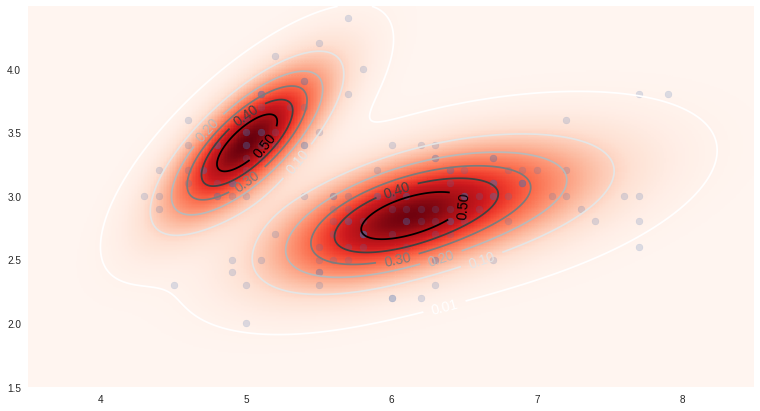

In [20]:
def pair_making(mean, cov):
    nm = mean[:2]
    nc = cov[:2, :2]
    return (nm, nc)

gauss_0_two_dim = sps.multivariate_normal(*pair_making(mean_0, cov_0))
gauss_1_two_dim = sps.multivariate_normal(*pair_making(mean_1, cov_1))
gauss_2_two_dim = sps.multivariate_normal(*pair_making(mean_2, cov_2))
I = np.array([0, 1])  # это можно передавать в качестве индексов
grid = np.mgrid[3.5:8.5:1e-2, 1.5:4.5:1e-2]

pos = np.empty(grid[0].shape + (2,))
pos[:, :, 0] = grid[0]; pos[:, :, 1] = grid[1]
density = 1/3 * (gauss_0_two_dim.pdf(pos) + 
                 gauss_1_two_dim.pdf(pos) + 
                 gauss_2_two_dim.pdf(pos))
p.figure(figsize=(13, 7))
p.pcolormesh(grid[0], 
               grid[1], 
               density, cmap='Reds')
p.scatter(X[:, 0], X[:, 1], alpha=0.2)
CS = p.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
p.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
p.show()

k, y_1, y_2 = 1, 2, 3

$$\mathsf{E}( X | {(T != k)}) = \int \limits_{\mathbb{R}} x \frac{p_{x, I\{T \not= k\}}(x, y)}{P(I\{T \not= k\} = 1)} dx = \frac{1}{2} \left(\int \limits_{\mathbb{R}} x p_{x, I\{T = y_1\}}(x, y_1) dx  + \int \limits_{\mathbb{R}} x p_{x, I\{T = y_2\}}(x, y_2) dx \right)$$

$$\frac{3}{2} \left(\int \limits_{\mathbb{R}} x p_{x, I\{T = y_1\}}(x, y_1) dx  + \int \limits_{\mathbb{R}} x p_{x, I\{T = y_2\}}(x, y_2) dx \right) = \frac{\mathsf{E}x_{y_1} + \mathsf{E}x_{y_2}}{2}$$

из ср. арифм. двух матожиданий находится условная плотность
$p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right) = \frac{p_{X|I\{T = k\}}\left(x \left| 2\right.\right) + p_{X|I\{T = k\}}\left(x \left| 3\right.\right)}{2}$

Вычислите условное математическое ожидание $\mathsf{E}( X | I\{T \not= k\} = 1)$ для всех $k = 1,2,3$, где $X$ --- случайный вектор, имеющий распределение смеси.
Постройте графики условной плотности $p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right)$ в проекции на первые две координаты. Подберите хорошие значения линий уровня.

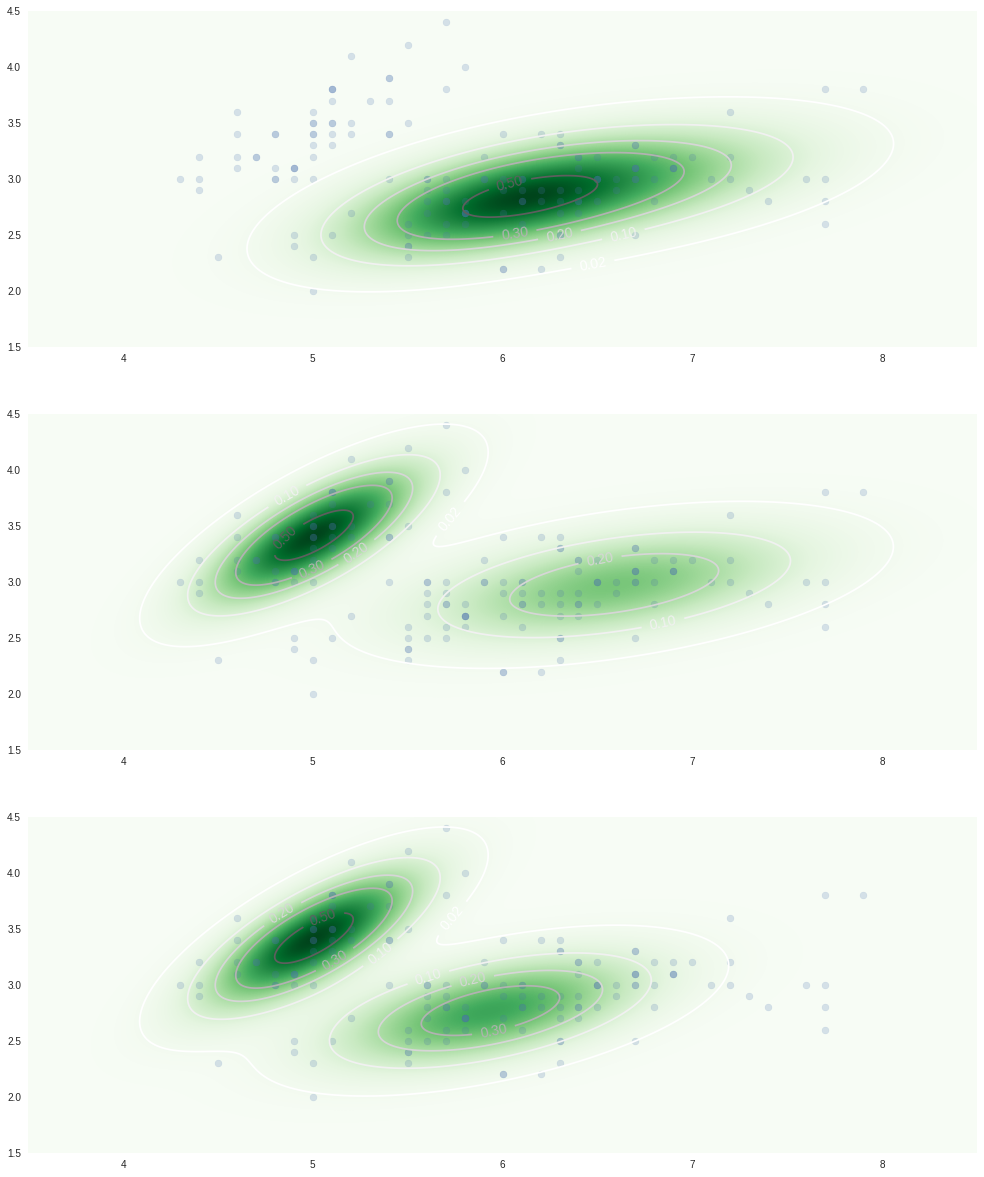

In [21]:
grid = np.mgrid[3.5:8.5:1e-3, 1.5:4.5:1e-3]
pos = np.empty(grid[0].shape + (2,))
pos[:, :, 0] = grid[0]; pos[:, :, 1] = grid[1]
density_0 = 1/3 * (gauss_1_two_dim.pdf(pos) + gauss_2_two_dim.pdf(pos))
density_1 = 1/3 * (gauss_0_two_dim.pdf(pos) + gauss_2_two_dim.pdf(pos))
density_2 = 1/3 * (gauss_0_two_dim.pdf(pos) + gauss_1_two_dim.pdf(pos))
p.figure(figsize=(17, 21))
for i, density in enumerate([density_0, density_1, density_2]):
    p.subplot(3, 1, i + 1)
    p.pcolormesh(grid[0], grid[1], density, cmap='Greens')
    p.scatter(X[:, 0], X[:, 1], alpha=0.2)
    CS = p.contour(grid[0], grid[1], density, [0.02, 0.1, 0.2, 0.3, 0.5, 0.7])
    p.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')


Классифицируйте все пространство по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$.
Посчитайте долю ошибок на выборке.
Нарисуйте классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3), где закрасьте разными цветами области, которые образовались в результате классификации.

In [22]:
get_argmax_k = lambda x: np.argmax(np.array([gauss_0.pdf(x), gauss_1.pdf(x), gauss_2.pdf(x)]))
y_p = np.array(list(map(lambda x: get_argmax_k(x), X)))
accuracy_score(y_p, y)
def get_pair_dens(mean, cov, ind_1, ind_2):
    mean_two_dim = mean[[ind_1, ind_2]]
    cov_two_dim = np.array([ [ cov[ind_1][ind_1], cov[ind_1][ind_2] ], [cov[ind_2][ind_1], cov[ind_2][ind_2] ] ])
    return (mean_two_dim, cov_two_dim)
def get_image(grid, densuty_1, densuty_2, densuty_3):
    pos = np.empty(grid[0].shape + (2,))
    pos[:, :, 0] = grid[0]; pos[:, :, 1] = grid[1]
    colors = np.array(list(map(lambda x:  np.argmax(x), 
                               np.hstack((densuty_1.pdf(pos).reshape(-1, 1), 
                                          densuty_2.pdf(pos).reshape(-1, 1), 
           densuty_3.pdf(pos).reshape(-1, 1))))))
    return colors.reshape(grid[0].shape)
def get_bounds(X_1, X_2):
    return [np.min(X_1), np.max(X_1), np.min(X_2), np.max(X_2)]

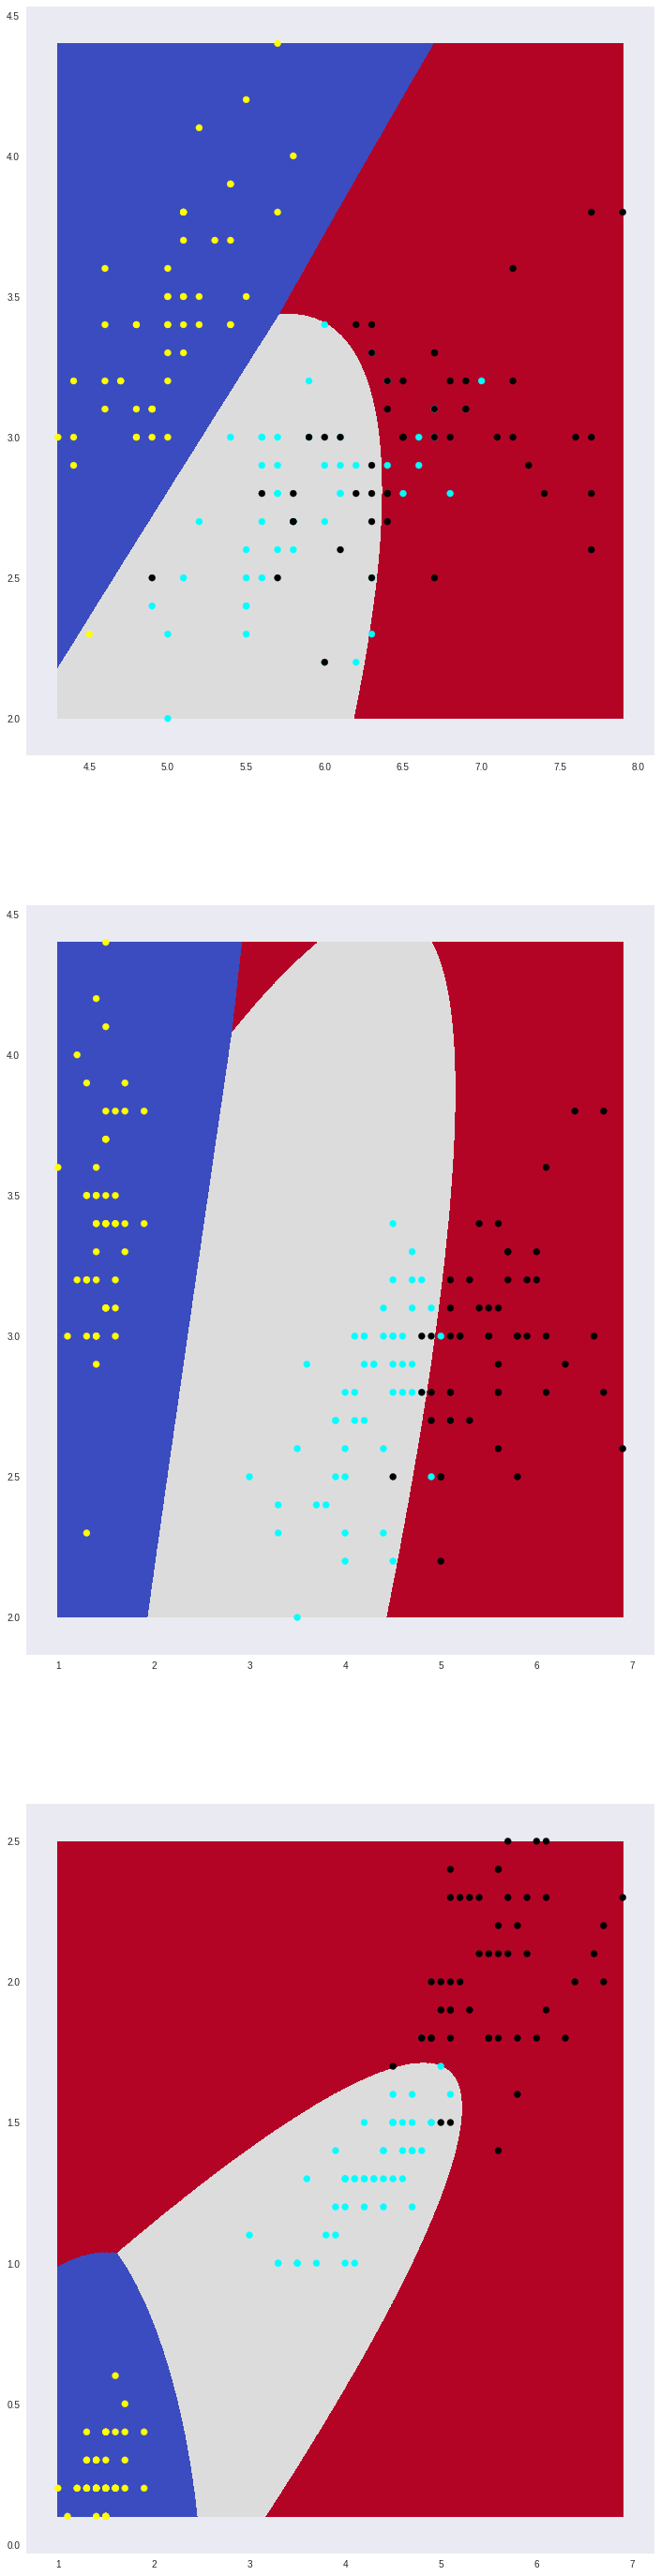

In [23]:
p.figure(figsize=(12, 50))
for i, indexes in enumerate([(0, 1), (2, 1), (2, 3)]): 
    x_min, x_max, y_min, y_max = get_bounds(X[:, indexes[0]], X[:, indexes[1]])
    grid = np.mgrid[x_min:x_max:1e-3, y_min:y_max:1e-3]
    colors = get_image(grid, sps.multivariate_normal(*get_pair_dens(mean_0, cov_0, *indexes)), 
              sps.multivariate_normal(*get_pair_dens(mean_1, cov_1, *indexes)), 
              sps.multivariate_normal(*get_pair_dens(mean_2, cov_2, *indexes)))
    p.subplot(3, 1, i + 1)
    p.pcolormesh(grid[0], grid[1], colors, cmap= 'coolwarm')
    colors_map = ['yellow', 'cyan', 'black']
    p.scatter(X[:, indexes[0]], X[:, indexes[1]], color=list(map(lambda y_once: colors_map[y_once], y)))
p.show()

**Вывод:** Построив графики мы увидели, что разбивать пространство по принципу максимизации - наглядно и полезно